###IMPORT PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###IMPORT DATA

* Read Dataset

In [ ]:
#read data csv
data = pd.read_csv("air_bnb.csv")

###DATA CLEANSING

* Hapus data data yang bernilai Null/NaN lalu tampilkan

In [ ]:
#lihat isi dataset
#hapus data yang NaN/Null
dataset = data.dropna()
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22449,29772631,Cosy and lovely room near Ostkreuz,20727291,Anna,Lichtenberg,Neu Lichtenberg,52.502952,13.490870,Private room,25,2,1,2018-11-04,1.00,1,32
22463,29784461,House on the water HT10 - Heart of East Berlin,22437698,Sebastian,Treptow - Köpenick,Oberschöneweide,52.457982,13.526945,Entire home/apt,99,1,5,2018-11-06,5.00,2,339
22475,29792124,Welcome to Light Apartment,224133729,Inna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.507884,13.467071,Private room,25,1,1,2018-11-05,1.00,1,8
22508,29817383,Prenzlauerberg,224295751,Salem,Pankow,Prenzlauer Berg Nordwest,52.552250,13.410904,Entire home/apt,70,1,1,2018-11-07,1.00,1,350


###DATA EXPLORATION

*Untuk clustering saya menggunakan dua atribut yang saling berkaitan yaitu latitude dan longtitude sebagai koordinat 

In [ ]:
#untuk clustering menggunakan latitude dan longtitude
xy = np.array([dataset.latitude, dataset.longitude])

* Visualisasikan latitude dan longtitude

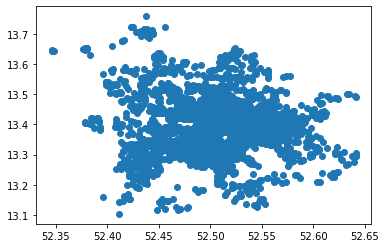

In [ ]:
#visualisasikan
plt.scatter(xy[0], xy[1])
plt.show()

In [ ]:
#menghitung jarak 2 titik
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a-b)**2))

* Buat fungsi untuk mencari centroids terdekat dengan titikk

In [ ]:
#untuk mencari centroid terdekat dengan titik
def find_best(a, centeroids):
    distance = [euclidean_distance(a, c) for c in centeroids]
    return np.argmax(distance)

* Fungsi untuk mengelompokan semua titik titik berdasarkan centroid yang paling dekat dengan titik tersebut

In [ ]:
#untuk mengelompokan semua titik berdasarkan centroid yg paling dekat sama titik tsb
def get_cluster(xy, centeroids, k):
    cluster = [[] for i in range(k)]
    for p in xy:
        idx = find_best(p, centeroids)
        cluster[idx].append(p)
    cluster = [np.array(c) for c in cluster]
    return cluster

* Fungsi untuk membuat centroid secara acak sebanyak k

In [ ]:
#membuat centroid sebanyak k secara acak
def create_centeroids(xy, k):
    x = np.random.uniform(xy.T[0].min(), xy.T[0].max(), k)
    y = np.random.uniform(xy.T[1].min(), xy.T[1].max(), k)
    return np.array([x, y]).T

* Buat fungsi K-Means untuk mengupdate posisi centroid ketika titik titik tsb sudah dikelompokan

In [ ]:
#fungsi kmeans, untuk update centroid
def kmeans(xy, centeroids, k, epsilon):
    while True:
        cluster = get_cluster(xy, centeroids, k)
        mean = np.copy(centeroids)
        for i in range(len(cluster)):
            if cluster[i].shape[0] > 0:
                mean = cluster[i].mean(0)
        if np.all(np.abs(centeroids - mean) <= epsilon):
            break
        else:
            centeroids = mean
    return centeroids

* Visualisasikan hasil clustering

In [ ]:
#fungsi untuk visualisasikan hasil clustering
def visualize(xy, centeroids, k):
    cluster = get_cluster(xy, centeroids, k) 
    for c in cluster:
        if c.shape[0] > 0:
            plt.scatter(c.T[0], c.T[1])
    plt.show()

##EKSPERIMEN 1

* Buat centroids secara acak

In [ ]:
#bikin centroid secara acak
k = 3
centeroids = create_centeroids(xy.T, k)

* Visualisasikan centroids

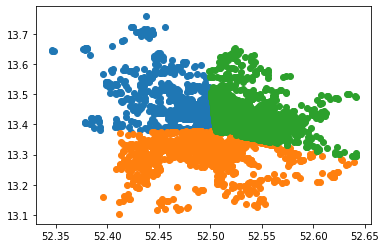

In [ ]:
#visualisasikan
visualize(xy.T, centeroids, k)

* Update posisi centroid yang sudah diubah dengan epsilon 0,1 yang menandakan jika selisihnya 0,1 atauu kurang maka akan stop

In [ ]:
#update posisi centroid  dengan epsilon 0.1
centeroids = kmeans(xy.T, centeroids, k, 0.1)

* Visualisasikan

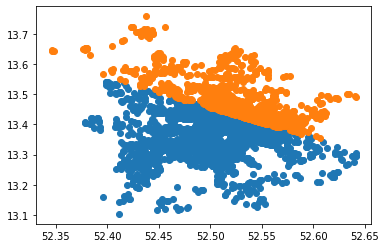

In [ ]:
#visualisasikan
visualize(xy.T, centeroids, k)

##EKSPERIMEN 2

* Buat centroids secara acak

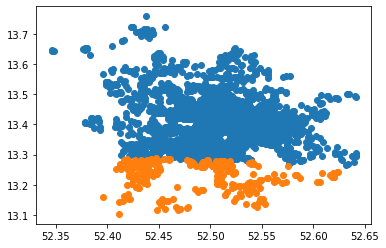

In [ ]:
#buat centroid secara acak
centeroids = create_centeroids(xy.T, k)
visualize(xy.T, centeroids, k)

* Update posisi centroid yang sudah diubah dengan epsilon 0,2 yang menandakan jika selisihnya 0,2 atauu kurang maka akan stop

In [ ]:
#update posisi centroid  dengan epsilon 0.2
centeroids = kmeans(xy.T, centeroids, k, 0.02)

* Visualisasikan

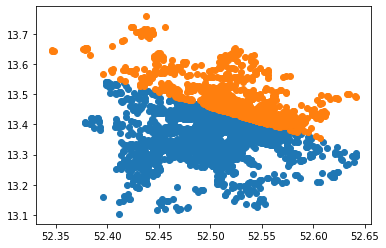

In [ ]:
#visualisasikan
visualize(xy.T, centeroids, k)

###KESIMPULAN

Dari 2 eksprimen yang telah dilakukan, dapat diambil kesimpulan bahwa epsilon  yang berbeda, menghasilkan hasil yang sangat berbeda, dengan bentuk cluster,letak centroid, jumlah cluster yang berbeda-beda.